In [5]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [6]:
def read_losses(class_name, batch_size):
    with open(f"checkpoints/{class_name}/losses.txt") as f:
        lines = f.readlines()

    epoch = []
    batch = []
    x = []
    y = []
    w = []
    h = []
    conf = []
    cls = []
    total = []
    recall = []
    precision = []

    for i in lines:
        l = i
        l = l.replace("[", "").replace("]", "").replace("\n", "").replace(",","").replace(":","").replace("/"," ")
        l = l.split(" ")
        
        epoch.append(int(l[1]))
        batch.append(int(l[4]))
        x.append(float(l[8]))
        y.append(float(l[10]))
        w.append(float(l[12]))
        h.append(float(l[14]))
        conf.append(float(l[16]))
        cls.append(float(l[18]))
        total.append(float(l[20]))

    losses = pd.DataFrame({
        "epoch": epoch,
        "batch": batch,
        "x": x,
        "y": y,
        "w": w,
        "h": h,
        "conf": conf,
        "cls": cls,
        "total": total,
    })

    k = np.array(losses.index)
    idxs = []
    vals = []
    val = 0
    for i in k:
        if (i/batch_size) % 1 == 0:
            idxs.append(i)
            vals.append(val)
            val += 1

    return losses, idxs, vals

In [7]:
losses_bicycle, idxs_bicycle, vals_bicycle = read_losses('bicycle', 58)
losses_helmet, idxs_helmet, vals_helmet = read_losses('helmet', 6)

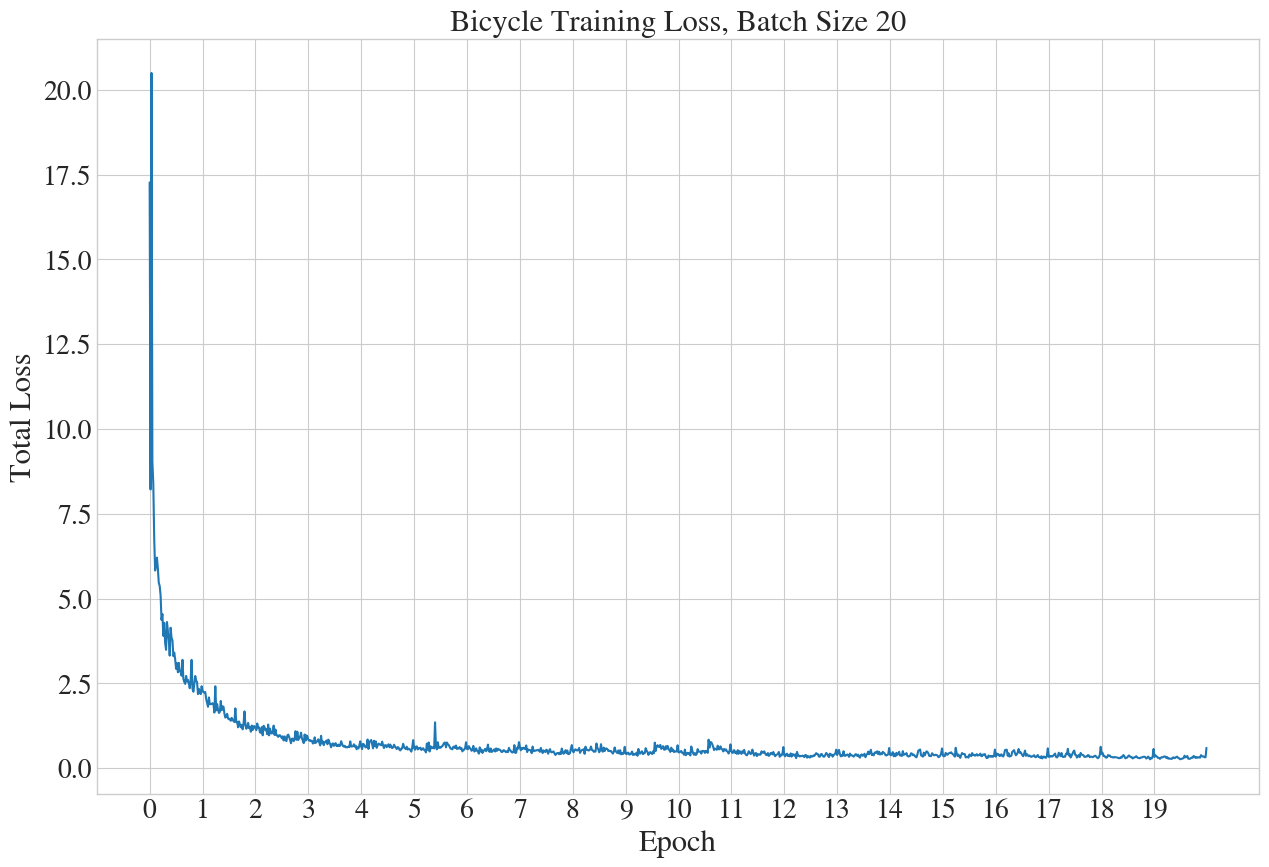

In [11]:
plt.figure(figsize = (15,10), dpi = 100)
plt.plot(losses_bicycle.index, losses_bicycle.total)
plt.xticks(idxs_bicycle, vals_bicycle)
plt.title('Bicycle Training Loss, Batch Size 20')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.savefig('plots/bicycle_loss.png', bbox_inches = 'tight')
plt.show()

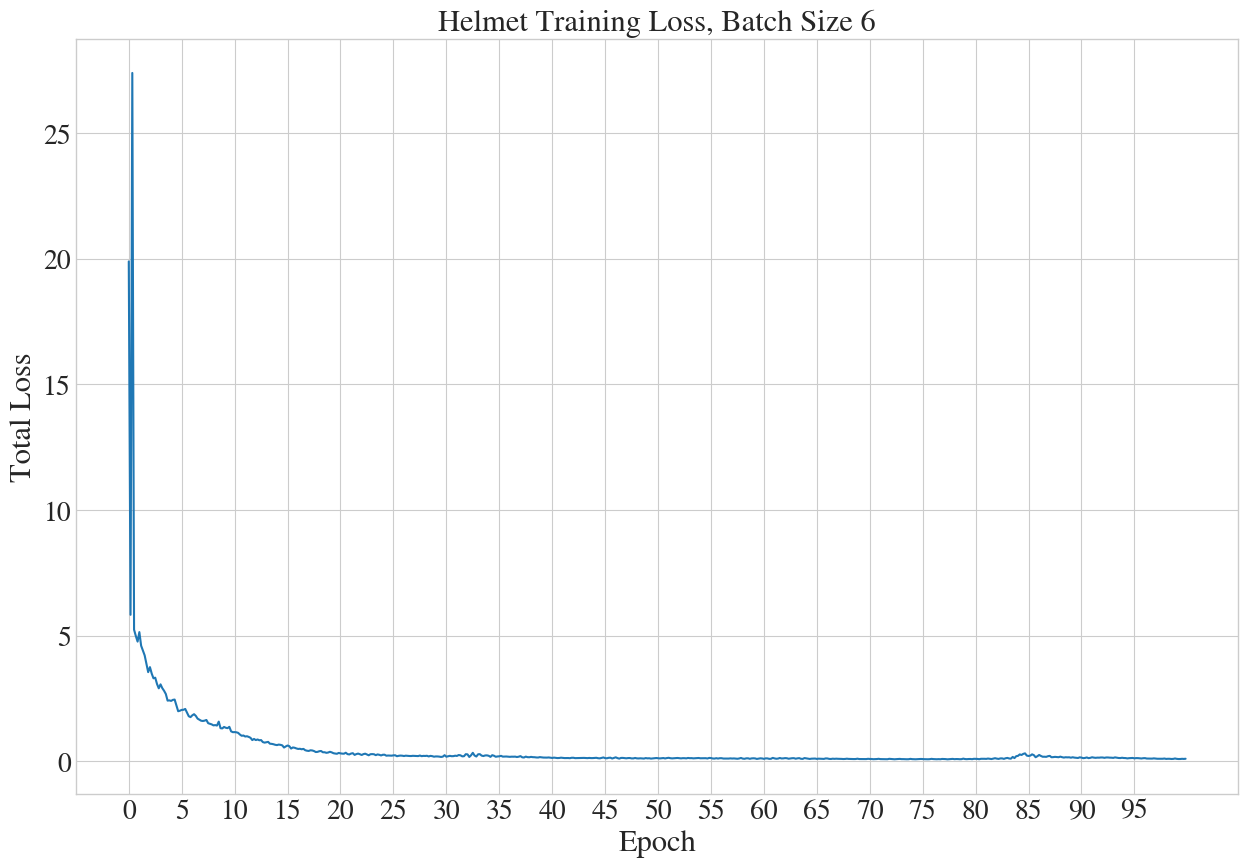

In [12]:
plt.figure(figsize = (15,10), dpi = 100)
plt.plot(losses_helmet.index, losses_helmet.total)
plt.xticks(idxs_helmet[::5], vals_helmet[::5])
plt.title('Helmet Training Loss, Batch Size 6')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.savefig('plots/helmet_loss.png', bbox_inches = 'tight')
plt.show()